In [3]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy.stats import norm

In [4]:
def pdf(x, **kywars):
  """
  Generar N distribuciones y su grafica 
  segubn el diccionario con valores asociados a su media 
  y desviacion estandar.
  """
  color = ["g","b","m","r","y"]
  f = {}
  # Generacion de N distribuciones estadisticas
  for key in kywars:
    fi = stats.norm(loc = kywars[key][0], scale = kywars[key][1])
    f[key] = fi

  # Grafica de las distribuciones estadisticas
  fig, ax = plt.subplots(1, 1)  
  for i, key in enumerate(f):
    ax.plot(x, f[key].pdf(x),f'{color[i]}-', lw = 3, alpha = 0.6, label=f'pdf {i}')    
  ax.set_xlabel("x")
  ax.set_ylabel("PDF(X)")
  return "Done", f

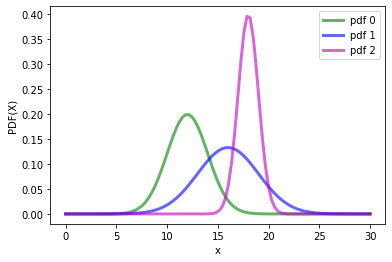

In [5]:
params = {"ms1":[12,2], "ms2":[16,3], "ms3":[18,1]}
x=np.linspace(0, 30,100)
_, f = pdf(x,**params)
plt.legend()

Supongamos tres distribuciones estadisticas asociadas a tres diferentes tipos de datos. Supongamos que las tres muestras estan asociadas a longitudes de las aletas de tres diferentes tipos de peces marinos.

- La verde son animales tipo 1.

- La azul son animales tipo 2.

- La purpura son animales tipo 3.









In [7]:
d1=f["ms1"].rvs(20)
d2=f["ms2"].rvs(20)
d3=f["ms3"].rvs(20)


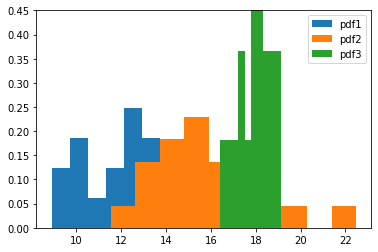

In [8]:
boundary = 12
plt.figure()
plt.hist(d1, density=True, label="pdf1")
plt.hist(d2, density=True, label="pdf2")
plt.hist(d3, density=True, label="pdf3")
plt.ylim(0,0.45)
plt.legend()
plt.show()

Poblacion: Coleccion de objetos o individuos
Muestra: Grupo optenido aleatoriamente

- Muestreo con reemplazo. 
- Muestreo sin remplazo 
- Muestreo aleatorio
- Muestreo estratificado:
- Muestreo sesgado: No representa la poblacion


0. Muestas representativa de las poblaciones 
1. Se puede tener, muestas sesgadas y no representativas de la población.


¿Como infererir las medias de las muestra con los datos que se estan obsevando?

  - Intervalor de confianzas
  - Pruebas de hipotesis




Bootstrapping: 

Remuestreo de los datos para obtener una muestra del estadistico que se calcula
(media)


- Dada una muestra $x=x_1,x_2,x_3, x_4, x_5$, se seleccionan N muuestas aleatorias con reposicion

  - $x'_1=x_1,x_1,x_2, x_1, x_5$
  - $x'_2=x_2,x_6,x_2, x_1, x_5$
  - $x'_3=x_5,x_1,x_5, x_1, x_5$
  - $x'_4=x_2,x_3,x_1, x_1, x_5$
  - .
  - .
  - .
- Para cada bootstrap se calcula el estadistico de interes(la media, mediana ...)
  - $\theta_1$, $\theta_2$, $\theta_3$... $\theta_n$

- $\langle \theta\rangle$ es la mejor aproximacion a la media de la poblacion con su desviacion estandar asociada.


In [11]:
# ! write a bootstraping python code for the next array [1,5,10,5,7,5,1,7,6] 
# GPT 3 code,  
# https://beta.openai.com/playground/p/default-friend-chat?model=text-davinci-001

import numpy as np 
def bootstrap(data, n): 
  bootstrap_sample = np.random.choice(data, size=n) 
  return bootstrap_sample

In [13]:
def mean_stimador(d):
  m=[]
  s=[]
  for i in range(0,100):
    data = bootstrap(d, len(d))
    m.append(np.mean(data))
    s.append(np.std(data))  
  return m, s

(array([1., 1., 1., 2., 1., 5., 3., 2., 2., 2.]),
 array([16.40873814, 16.68253145, 16.95632477, 17.23011808, 17.5039114 ,
        17.77770471, 18.05149803, 18.32529134, 18.59908466, 18.87287797,
        19.14667129]),
 <a list of 10 Patch objects>)

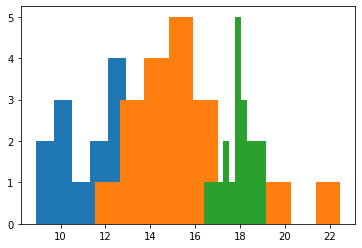

In [16]:
plt.hist(d1)
plt.hist(d2)
plt.hist(d3)


In [18]:
m_d1, s_d1 = mean_stimador(d1)
print(np.mean(m_d1))
print(np.mean(s_d1))

12.436704779516544
2.0997557250067427


In [ ]:
m_d2, s_d2 = mean_stimador(d2)
print(np.mean(m_d2))
print(np.mean(s_d2))

16.744237340899154
2.4212919266630824


In [ ]:
m_d3, s_d3 = mean_stimador(d3)
print(np.mean(m_d3))
print(np.mean(s_d3))

17.824145178647782
0.9580359918996293


[Teorema del limite central](https://es.wikipedia.org/wiki/Teorema_del_l%C3%ADmite_central)

In [ ]:
mlc = []
for i in range(0,1000):
  mlc.append(np.mean(f["ms1"].rvs(100)))  

(array([0.19001599, 0.09500799, 0.33252798, 0.80756794, 0.95007993,
        1.09259192, 0.80756794, 0.33252798, 0.09500799, 0.047504  ]),
 array([10.64312356, 10.85363217, 11.06414077, 11.27464938, 11.48515798,
        11.69566659, 11.90617519, 12.11668379, 12.3271924 , 12.537701  ,
        12.74820961]),
 <a list of 10 Patch objects>)

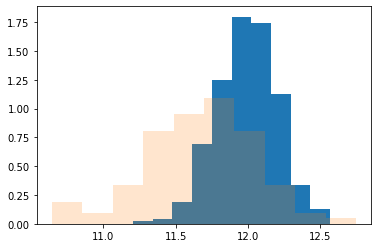

In [ ]:
plt.hist(mlc, density=True) # Media de diferentes distribuciones de los datos originales
plt.hist(m,density=True, alpha=0.2)   # Media de la distribuciones empleando bottstraping


In [ ]:
plt.hist?